<a href="https://colab.research.google.com/github/AkankshaB123/forecasting/blob/main/Bitcoin_Time_Series_EDA_%26_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries and Data**

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#Load the data
df = pd.read_csv('/content/drive/MyDrive/Bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
#Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df.set_index('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
#Select the Bitcoin Data for November 2021
#Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df = df.set_index('Date') # Assign the result back to df
df.head()

#Select the Bitcoin Data for November 2021
# Please note that the date '2014-09-21' may not be in November 2021
# and should be adjusted to '2021-11-01' for example
df.loc['2014-09-21']

,2014-09-21
Open,4.080850e+02
High,4.124260e+02
Low,3.931810e+02
Close,3.988210e+02
Adj Close,3.988210e+02
Volume,2.658010e+07


In [ ]:
#Loading the data and Setting the Index
df1 = pd.read_csv("/content/sample_data/Bitcoin.csv",index_col="Date",parse_dates=True)
df1.index

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Bitcoin.csv'

In [ ]:
#Resampling to Monthly Frequency and calculate the mean closing price
df.resample('M').mean()

In [ ]:
df.resample('W').mean()

In [ ]:
#Exploring Data
#7-Day rolling average of the closing price
df['7_day_rolling'] = df['Close'].rolling(window=7).mean()
df[['Close','7_day_rolling']].plot()
#Lot of data to consume/interpret

In [ ]:
df[['Close','7_day_rolling']].loc['2022-01-01':'2022-12-31'].plot() # Slice by specifying start and end dates of 2022
plt.show()

In [ ]:
#Find out the highest average month
df.resample('M').mean()['Close'].idxmax()

In [ ]:
# Calculate Daily Returns - Commonly used in Finance
df['daily_returns'] = df['Close'].pct_change()*100

In [ ]:
# Days with more than 10% change in closing price
df[abs(df['daily_returns'])>10].head()
# This data is very volatile

# **Data Visualisation**

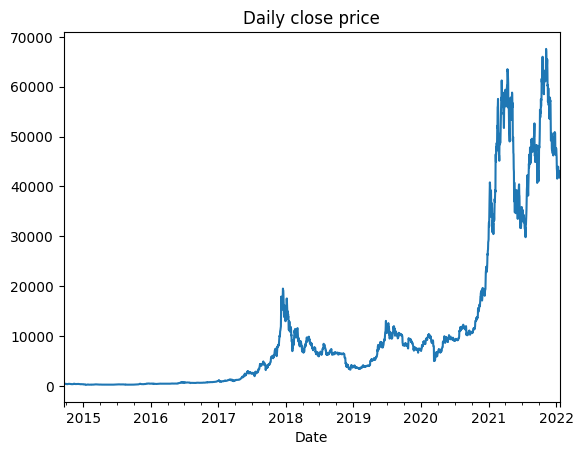

In [ ]:
# Daily Closing Price Plot
df['Close'].plot(title = 'Daily close price')
plt.show()

<ipython-input-6-b5086ca17dcd>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['Volume'].plot(title = 'Yearly volume')


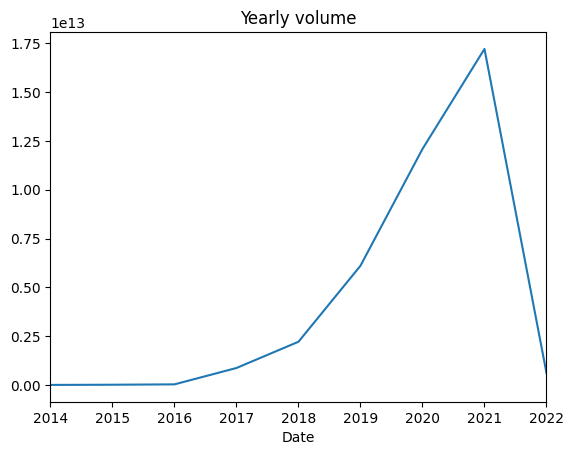

In [ ]:
# Plot yearly volume
df.resample('Y').sum()['Volume'].plot(title = 'Yearly volume')
plt.show()

<Axes: xlabel='Date'>

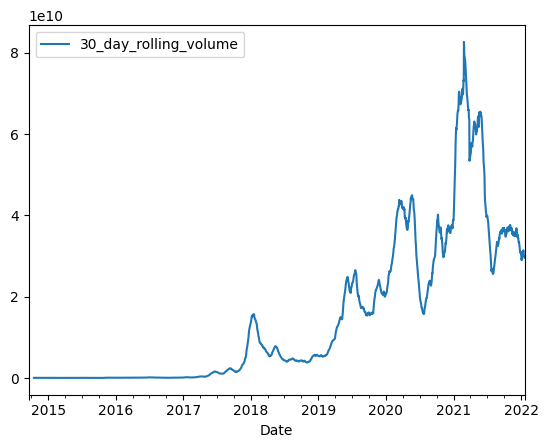

In [ ]:
# Plotting Closing Price and 30-day rolling volume
df['30_day_rolling_volume'] = df['Volume'].rolling(window=30).mean()
df['30_day_rolling_volume'].plot(legend=True)

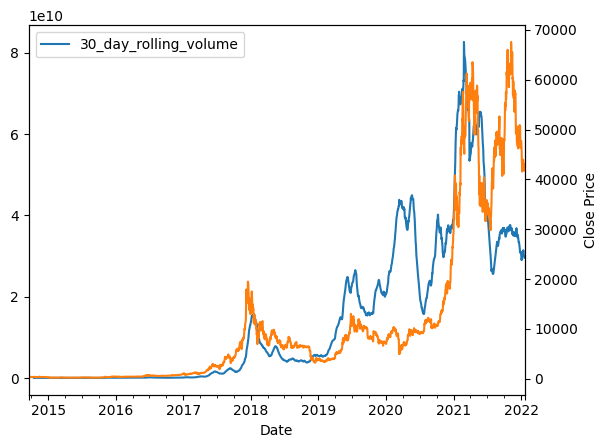

In [ ]:
df['30_day_rolling_volume'].plot(legend=True)
ax = df['Close'].plot(secondary_y=True)
ax.set_ylabel('Close Price')
plt.show()

In [ ]:
df[['Close','30_day_rolling_volume']].corr()

,Close,30_day_rolling_volume
Close,1.000000,0.801955
30_day_rolling_volume,0.801955,1.000000


# **Data Visualization**

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,30_day_rolling_volume
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN


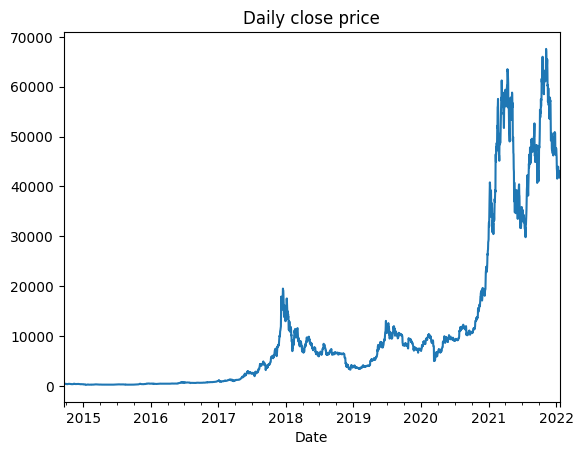

In [ ]:
#Daily closing price
df['Close'].plot(title = 'Daily close price')
plt.show()

In [ ]:
# Daily close price - x-axis should be year

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Ensure 'Date' column is a datetime object and set as index:
df['Date'] = pd.to_datetime(df['Date']) # Convert the 'Date' column to datetime if needed
df = df.set_index('Date') # Set 'Date' as index


# Resample to yearly frequency and plot the mean closing price
df['Close'].resample('YE').mean().plot(title='Yearly Average Close Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

KeyError: 'Date'

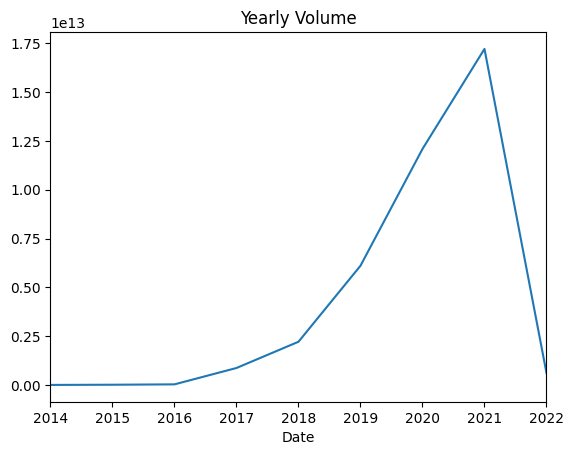

In [ ]:
# Plot the yearly volume
df.resample('YE').sum()['Volume'].plot(title='Yearly Volume')
plt.show()
# Finding: Volume spiked in 2021

# **Data Manipulation**

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
30_day_rolling_volume,29


In [ ]:
# Option 1: Fill missing values
df['30_day_rolling_volume'].fillna(method='bfill',inplace=True)

<ipython-input-15-15105ca292c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['30_day_rolling_volume'].fillna(method='bfill',inplace=True)
<ipython-input-15-15105ca292c2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_volume'].fillna(method='bfill',inplace=True)


In [ ]:
# Option 2: Interpolate missing volume
# df['7_day_rolling_volume'].interpolate(inplace = True)

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
30_day_rolling_volume,0


In [ ]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek_numeric'] = df.index.dayofweek
df['weekname'] = df.index.day_name()
#df['weekofyear'] = df.index.weekofyear
#df['quarter'] = df.index.quarter
df.head()

,Open,High,Low,Close,Adj Close,Volume,30_day_rolling_volume,year,month,day,dayofweek_numeric,weekname
Date,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,3.624856e+07,2014,9,17,2,Wednesday
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,3.624856e+07,2014,9,18,3,Thursday
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,3.624856e+07,2014,9,19,4,Friday
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.624856e+07,2014,9,20,5,Saturday
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,3.624856e+07,2014,9,21,6,Sunday


In [ ]:
# Feature engineering - Lagged values
df['close_lag1'] = df['Close'].shift(1)
df['close_lag2'] = df['Close'].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,30_day_rolling_volume,year,month,day,dayofweek_numeric,weekname,close_lag1,close_lag2
Date,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,3.624856e+07,2014,9,17,2,Wednesday,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,3.624856e+07,2014,9,18,3,Thursday,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,3.624856e+07,2014,9,19,4,Friday,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.624856e+07,2014,9,20,5,Saturday,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,3.624856e+07,2014,9,21,6,Sunday,408.903992,394.795990


# **Seasonality**

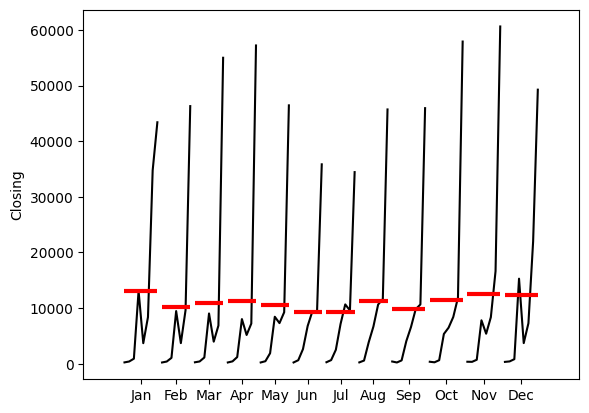

In [ ]:
# Plotting the monthly seasonality
month_plot(df['Close'].resample('ME').mean(),
           ylabel = 'Closing')
plt.show()
# Red represent - average values; some sort of seasonality

<ipython-input-21-fdedb55d5443>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(),


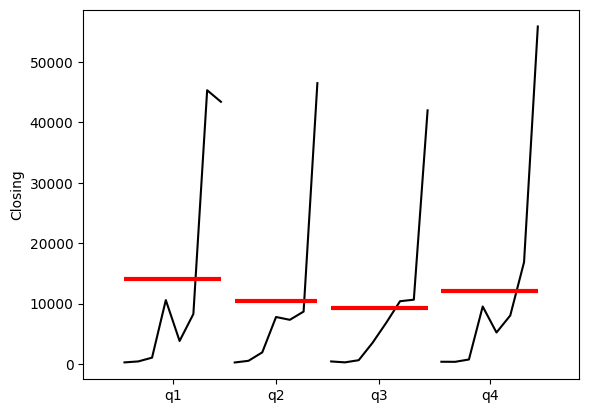

In [ ]:
# Plotting the monthly seasonality
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()
# Red represent - average values, seasonality

In [ ]:
import pandas as pd
choco_sales_df = pd.read_csv('/content/drive/MyDrive/choco_monthly_revenue.csv', index_col = 0, parse_dates = True)  # Replace with your actual file name

In [ ]:
choco_sales_df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


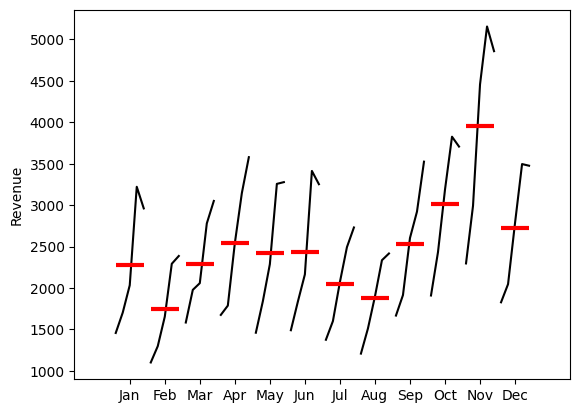

In [ ]:
# Plotting the monthly seasonality
month_plot(choco_sales_df['revenue'].resample('ME').mean(),
           ylabel = 'Revenue')
plt.show()
#This has more seasonality -> ups and downs, deeper-seasonality curve

# **Seasonal Decomposition**


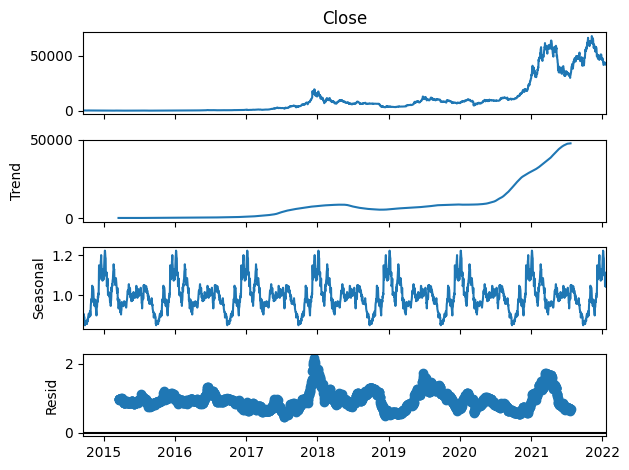

In [ ]:
seasonal_decompose(df['Close'],model='mul',period=365).plot()
plt.show()

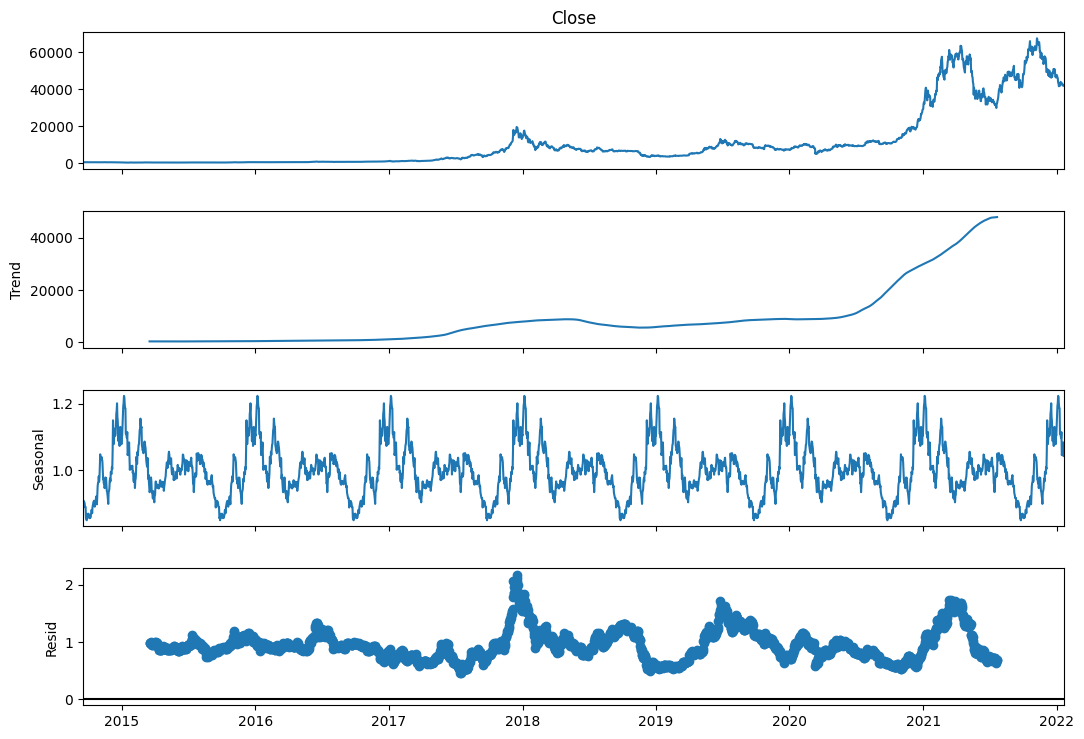

In [ ]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['Close'],model='mul',period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

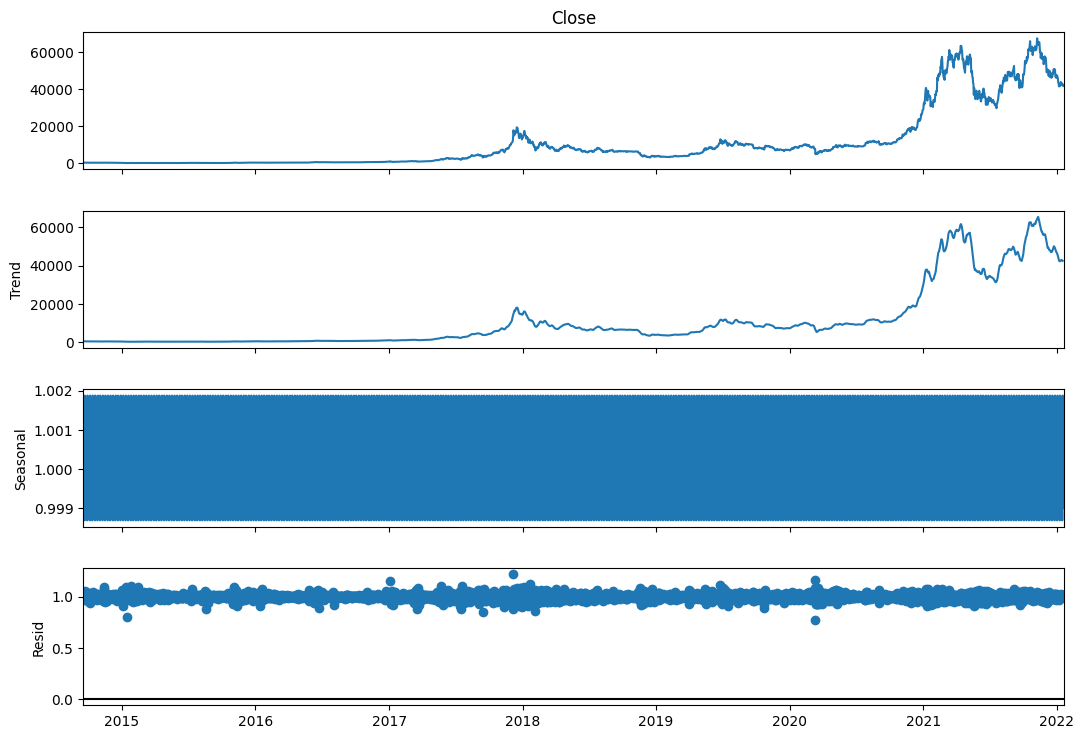

In [ ]:
# Seasonal Decomposition Plots for Bitcoin Data - 7 is more common
decomposition = seasonal_decompose(df['Close'],model='mul',period=7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

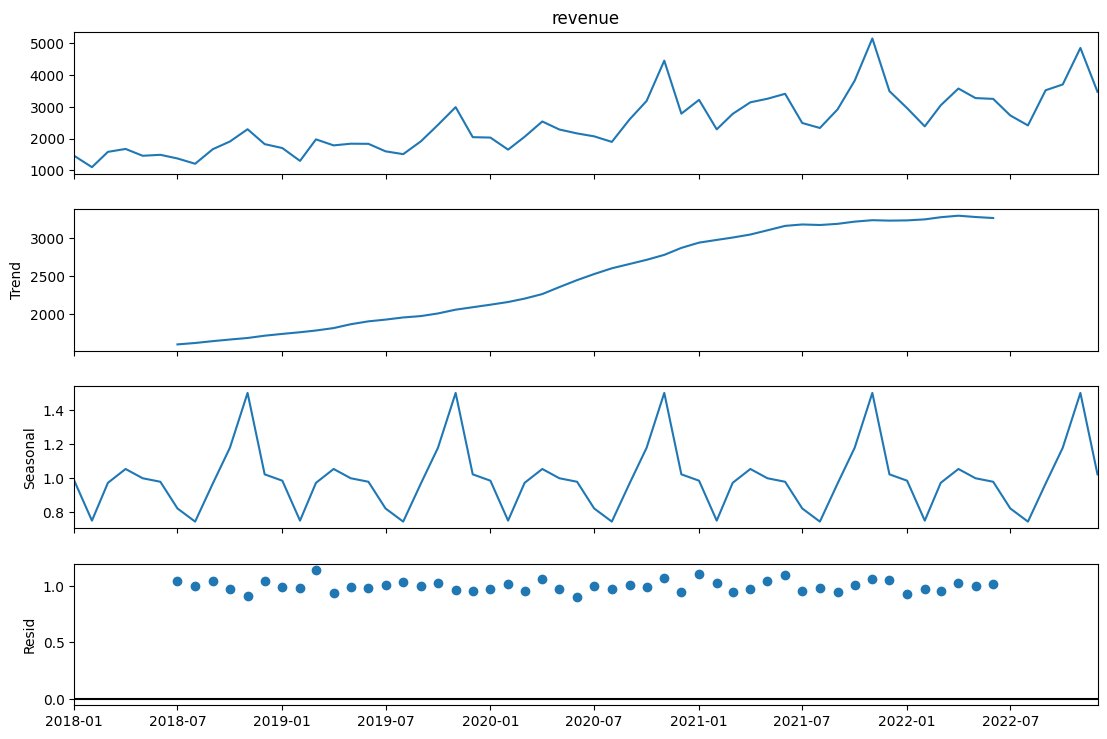

In [ ]:
# Seasonal Decomposition Plots for Choco Monthly Data
decomposition = seasonal_decompose(choco_sales_df['revenue'],model='mul',period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
# Seasonality is multiplicative

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quartely
* 5 for weekdays

# **Auto-correlation**

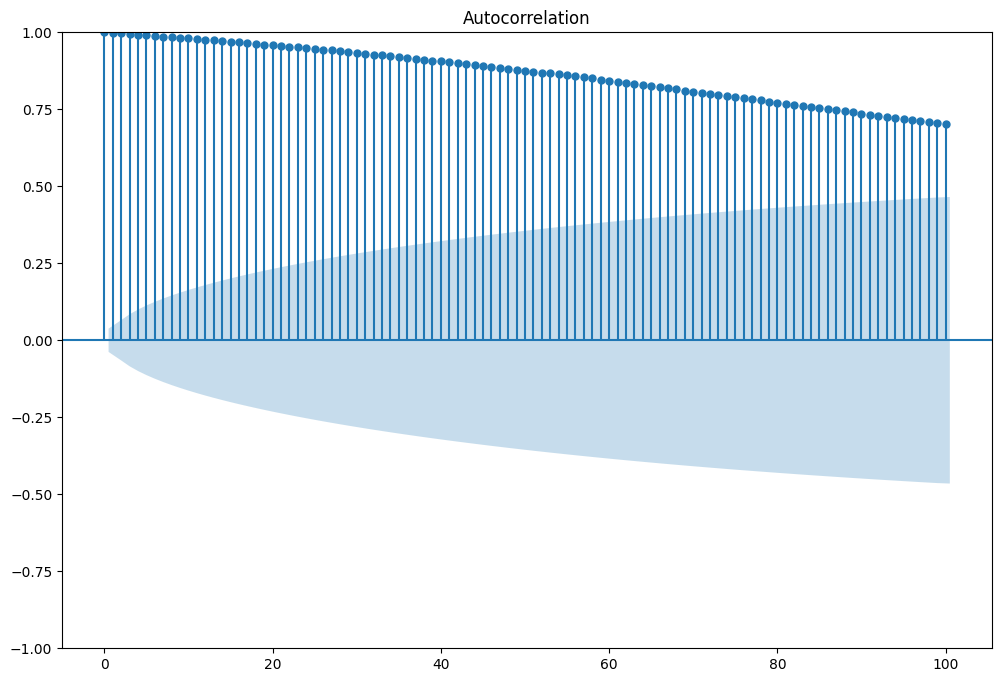

In [ ]:
# Plot the auto-correlation (ACF)
fig, ax = plt.subplots(figsize=(12, 8))
plot_acf(df['Close'], lags=100, ax=ax)
plt.show()

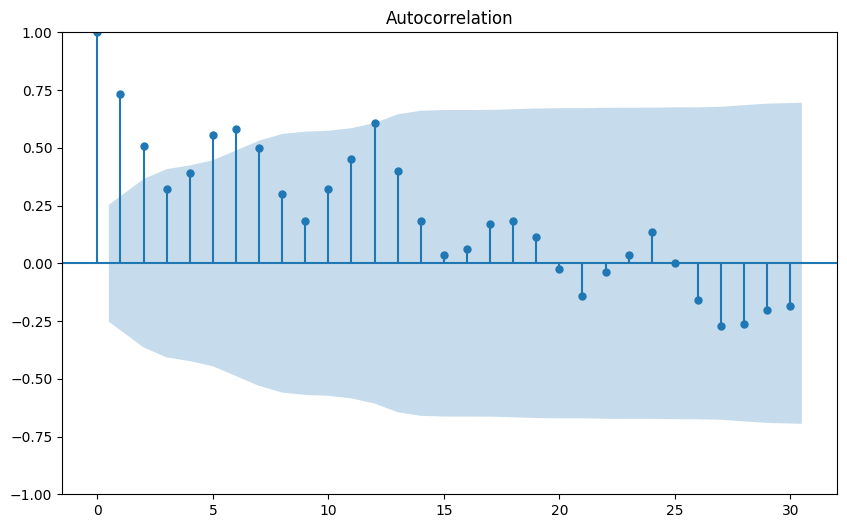

In [ ]:
# Plot the auto-correlation (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(choco_sales_df['revenue'], lags=30, ax=ax)
plt.show()
# We need partial auto-correlation to accurately decipher this: PACF tells direct connection between data points at various times without the effect of inbetween points
# While ACF gives overall picture, PACF zooms in on specific

# **Partial Auto-Correlation**

In [ ]:
#Key points about PACF
#1. Quick drop-off means only recent values directly impact current values.
#2. Slow drop-off/oscillate means older values continue to exert a direct influence.

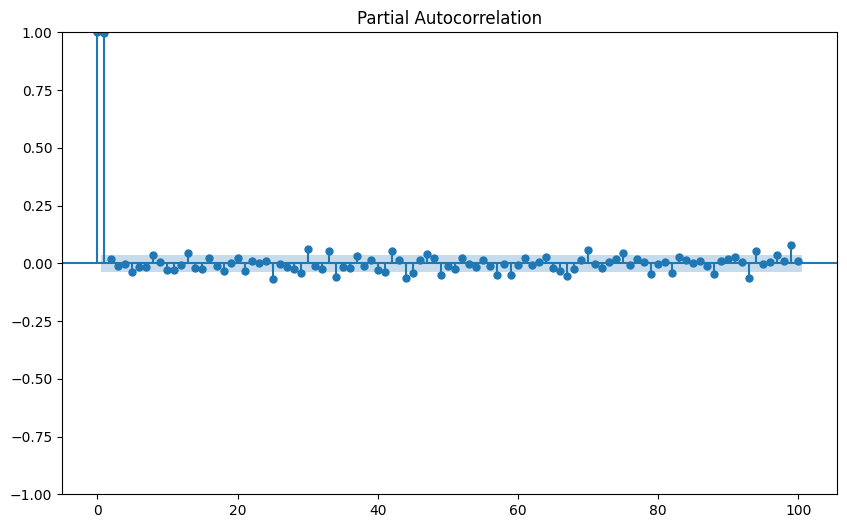

In [ ]:
# Plot the Partial Auto-Correlation (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['Close'], lags=100, ax=ax)
plt.show()
#Finding: Quick drop-off means only recent values directly impact current values

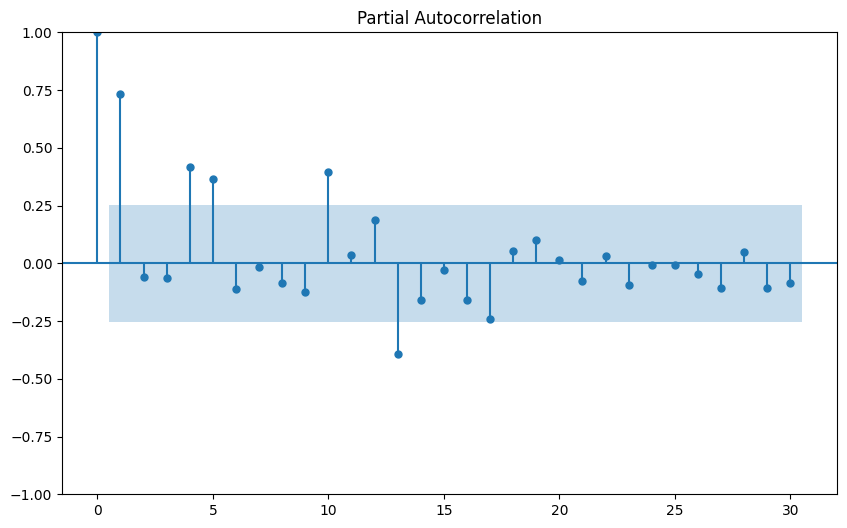

In [ ]:
# Plot the Partial Auto-Correlation (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(choco_sales_df['revenue'], lags=30, ax=ax)
plt.show()
# While ACF gives overall picture, PACF zooms in on specific
#Finding: Slow drop-off/oscillate means older values continue to exert a direct influence.